Problem 1

a.)

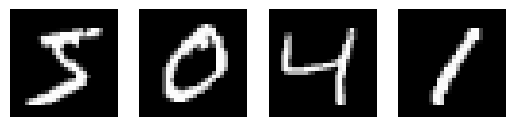

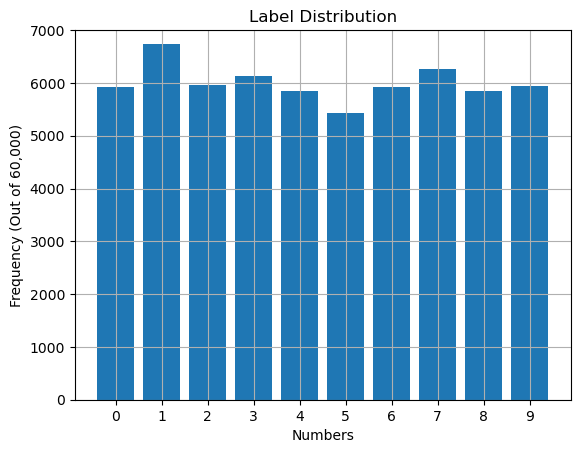

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
for i in range(4): 
    plt.subplot(141 + i)
    plt.imshow(train_X[i], cmap='gray')
    plt.axis('off')


plt.figure()
plt.hist(train_y, bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10))
plt.ylim(0,7000)

plt.title("Label Distribution")
plt.xlabel("Numbers")
plt.ylabel("Frequency (Out of 60,000)")
plt.grid()
plt.show()

Classes are the different things that are being detected, identified, or separated in a dataset. For this dataset, the numbers 0 - 9 are individual classes. Each data item in a data set is already given a label which corresponds to a specific class. Machine learning models use the labels to train and check their work to see if they can accurately make predicitons. 

ii)

In [2]:
print("Image Shapes: ")
print(str(train_y.shape))

Image Shapes: 
(60000,)


The pixel values are between 0 and 255 but are in grayscale, whihc means that a pixel vlaue of 0 is white while a value of 255 is completely black

Problem 2)

a)

i.) Convolutional layers are fundamental in image processing for extracting features from input data. In the context of neural networks, Conv2D is specifically designed for 2D spatial convolution, which is suitable for image data. They take 5 parameters: filters, kernel size, strides, padding, and activation. Strides is the step size for moving the filter over the input data, padding determines how to handle the borders of the input, and activation is the specific activation function applied, like ReLU.

ii.) Pooling layers are used to reduce the spatial dimensions of the input volume, thus reducing computation in the network and controlling overfitting. Pooling layers take 3 types of parameters: pool_size, padding, and strides. Strides and padding are the same thing mentioned in convolutional layers and pool_size is the size of the overall pooling window.

iii.) Activation functions are applied element-wise to the output of a layer, transforming the input into the output of the layer. Specifically, activation layers introduce non-linearities into the network, allowing it to learn complex patterns. For example, the ReLU activation function is a effective function that replaces all negative values in the input with zero and leaves positive values unchanged.The sigmoid activation function constricts input values to the range of 0 to 1. It is commonly used in the output layer of binary classification models, where the goal is to produce a probability.

iv.) A fully connected layer connects every neuron in one layer to every neuron in the next layer and is also known as a dense layer. The fully connected layer takes an activation function as a perimeter. The Global Average Pooling (GAP) is used to reduce the spatial dimensions of each feature map to a single value, effectively converting the entire spatial information into a compact representation. Batch Normalization normalizes the input of a layer by adjusting and scaling the activations. It helps with faster convergence during training and reduces sensitivity to weight initialization. BatchNorm takes the momentum and epsilon as parameters.

Problem 3

In [3]:
import keras
from keras import layers, models
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

Problem 4

In [4]:
predicted_labels = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)


conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 972    0    1    0    2    0    1    2    2    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   1    2 1016    0    3    0    1    7    2    0]
 [   0    0    1  999    0    3    0    3    4    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   2    0    0    5    0  878    3    1    1    2]
 [   2    2    0    0    4    2  945    0    3    0]
 [   0    2    1    2    2    0    0 1019    1    1]
 [   3    0    2    0    1    1    0    1  965    1]
 [   0    3    0    0    9    2    0    4    1  990]]


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.9898

Test accuracy: 98.98%
